# **Algoritma K-Means**

**K-Means Clustering** adalah salah satu algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kesamaan tertentu. Algoritma ini bekerja dengan cara membagi dataset yang tidak berlabel menjadi K cluster, di mana setiap cluster memiliki titik pusat yang disebut centroid.


**Manfaat clustering**


- Segmentasi Data – Memudahkan dalam mengelompokkan data berdasarkan pola tertentu, seperti segmentasi pelanggan dalam bisnis.

- Deteksi Pola – Membantu menemukan pola tersembunyi dalam dataset yang besar, berguna dalam riset pasar dan analisis tren.

- Efisiensi dalam Pengolahan Data – Algoritma ini cepat dan efisien, sehingga cocok untuk dataset berukuran besar.

- Penerapan dalam Berbagai Industri – Digunakan dalam pengelompokan dokumen, segmentasi gambar, dan kompresi gambar.

- Membantu Pengambilan Keputusan – Dengan mengelompokkan data ke dalam kategori yang lebih jelas, K-Means Clustering membantu dalam pengambilan keputusan berbasis data.

**Inertia (Sum Square error/SSE)**


Inertia (Sum of Squared Errors/SSE) adalah metrik yang digunakan dalam K-Means Clustering untuk mengukur seberapa baik data dikelompokkan ke dalam cluster. Inertia dihitung sebagai jumlah kuadrat jarak antara setiap titik data dan centroid cluster yang ditetapkan.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

**Silhouette Analysis**


Silhouette Analysis adalah metode evaluasi dalam clustering yang digunakan untuk mengukur seberapa baik setiap titik data berada dalam cluster yang sesuai dibandingkan dengan cluster lainnya. Teknik ini memberikan gambaran grafis tentang seberapa baik objek telah diklasifikasikan.

Silhouette Analysis sering digunakan untuk menentukan jumlah cluster optimal dalam K-Means Clustering. Dengan membandingkan Silhouette Score untuk berbagai jumlah cluster, kita bisa memilih jumlah cluster yang memberikan pemisahan terbaik.

Rumusnya Silhouette Score adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


**Implementasi menggunakan data Iris**

In [6]:
%pip install pymysql
%pip install psycopg2

**Library yang digunakan**

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Pengumpulan Data**

In [8]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-319a464f-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_EVJaXCw9MKrhLxoQcKj",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM lira.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-19018c16-auraibraliraiza09.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_rsy2_HLnOlER6ZAwLDN",
        database="defaultdb",
        port=13533
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa          14.0          2.0          41.0         32.0
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          13.0          2.0          40.0         56.0
  4     Iris-setosa          15.0          2.0          23.0         47.0
  5     Iris-setosa          14.0          2.0          38.0         52.0
  6     Iris-setosa           1.7          0.4           3.5          4.2
  7     Iris-setosa           1.4          0.3           3.5          5.7
  8     Iris-setosa           1.5          0.2           4.5          5.0
  9     Iris-setosa           1.4          0.2           4.3          5.4
 10     Iris-setosa           1.5          0.1           3.5          4.5
 11     Iris-setosa           1.5          0.2           4.3          5.6
 12     Iris-setosa           1.6          0.2           4.3          5.8
 13     Iris-setosa           1.4     

**Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [9]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.24733462 -0.17008207 -0.25895366 -0.25625601]
 [ 3.46268463  2.38114903  3.62535119  3.58758416]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.31842511 -0.31731805 -0.2892274  -0.2629765 ]
 [ 3.46268463  2.38114903  3.62535119  3.58758416]
 [ 1.67210861  3.80528939  0.55843734 -0.07480289]]
Akurasi (Adjusted Rand Score): 0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.31842511 -0.31731805 -0.2892274  -0.2629765 ]
 [ 3.4433061   2.41188587  4.0965482   4.35738526]
 [ 1.67210861  3.80528939  0.55843734 -0.07480289]
 [ 3.48206316  2.35041219  3.15415419  2.81778306]]
Akurasi (Adjusted Rand Score): 0.005


**Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

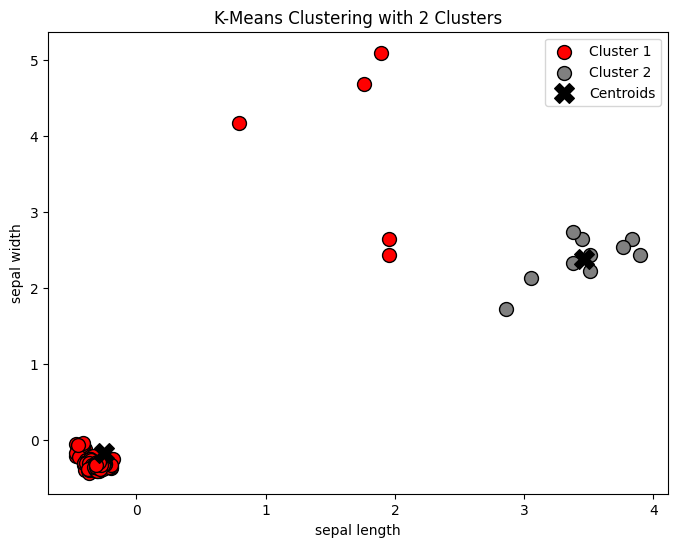

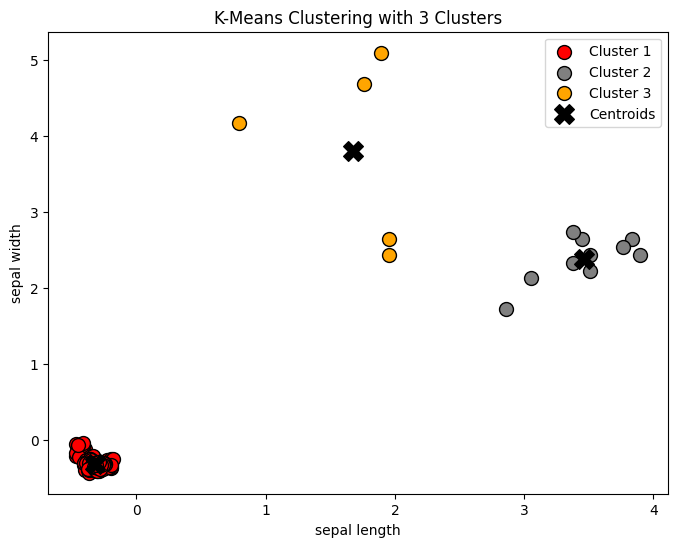

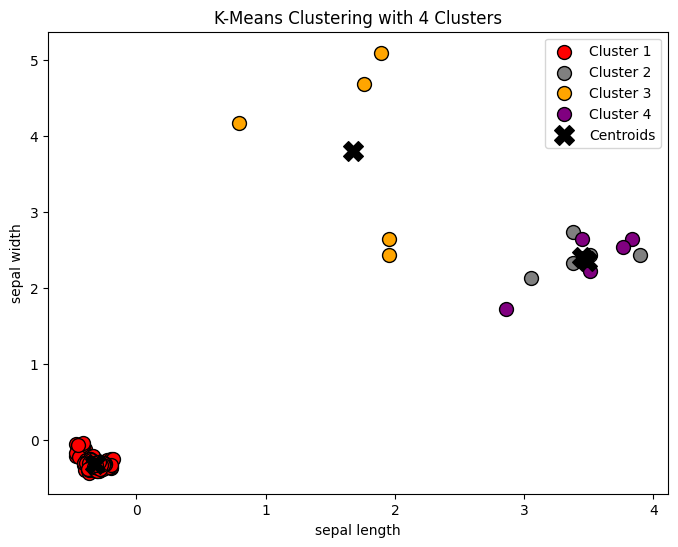

In [10]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi K-Means + plot tanpa cmap
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))

    # Daftar warna manual (pastikan cukup untuk jumlah klaster)
    colors = ['red', 'gray', 'orange', 'purple']

    for cluster in range(k):
        cluster_points = X_scaled[labels == cluster]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1],
            c=colors[cluster % len(colors)], label=f'Cluster {cluster + 1}',
            s=100, edgecolors='k'
        )

    # Plot centroid
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        c='black', marker='X', s=200, label='Centroids'
    )

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Jalankan untuk K = 2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)

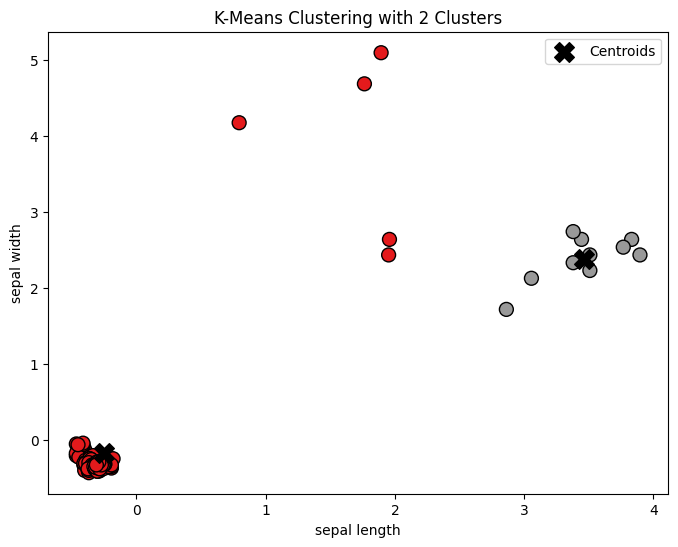

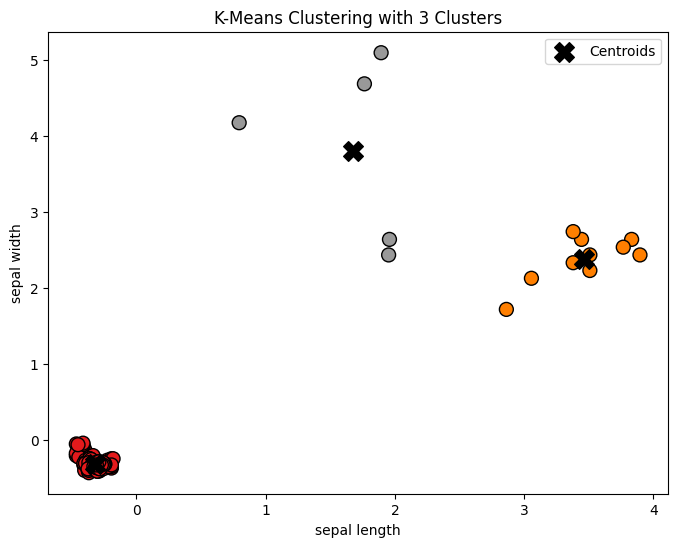

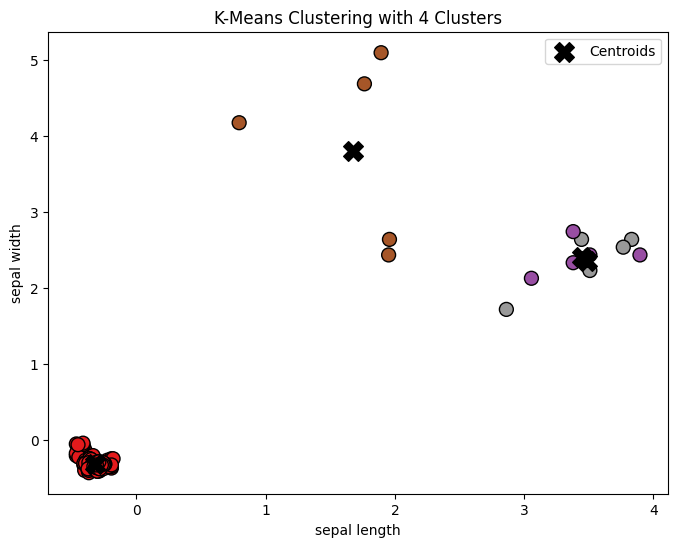

In [11]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


**Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [12]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.24733462 -0.17008207 -0.25895366 -0.25625601]
 [ 3.46268463  2.38114903  3.62535119  3.58758416]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [ 1.95761893  2.63728938  0.55843734 -0.07480289]), Klaster: 0, Centroid: [-0.24733462 -0.17008207 -0.25895366 -0.25625601], Jarak kuadrat: 13.444, Inertia sementara: 13.444
Titik data 2 (Fitur: [ 1.95115942  2.4323771   0.55843734 -0.07480289]), Klaster: 0, Centroid: [-0.24733462 -0.17008207 -0.25895366 -0.25625601], Jarak kuadrat: 12.307, Inertia sementara: 25.751
Titik data 3 (Fitur: [ 1.89302384  5.09623677  0.4757712  -0.07480289]), Klaster: 0, Centroid: [-0.24733462 -0.17008207 -0.25895366 -0.25625601], Jarak kuadrat: 32.888, Inertia sementara: 58.639
Titik data 4 (Fitur: [ 0.79490723  4.1741315   0.64110348 -0.07480289]), Klaster: 0, Centroid: [-0.24733462 -0.17008207 -0.25895366 -0.25625601], Jarak kuadrat: 20.801, Inertia sementara: 79.441
Ti

**Model Plotting Diagram Elbow Method**

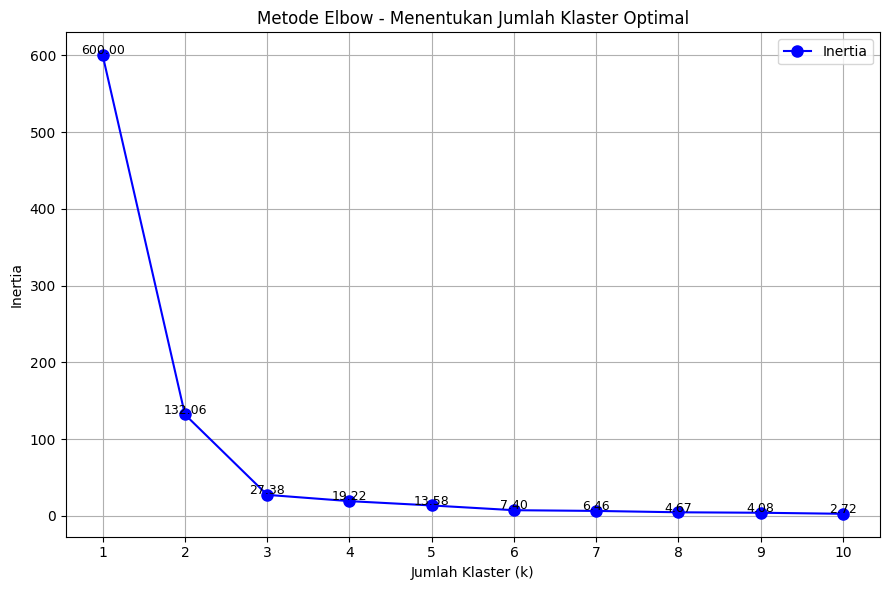

In [13]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

**Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.24733462 -0.17008207 -0.25895366 -0.25625601]
 [ 3.46268463  2.38114903  3.62535119  3.58758416]]
Silhouette Score untuk 2 klaster: 0.901

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.31842511 -0.31731805 -0.2892274  -0.2629765 ]
 [ 3.46268463  2.38114903  3.62535119  3.58758416]
 [ 1.67210861  3.80528939  0.55843734 -0.07480289]]
Silhouette Score untuk 3 klaster: 0.913

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.31842511 -0.31731805 -0.2892274  -0.2629765 ]
 [ 3.4433061   2.41188587  4.0965482   4.35738526]
 [ 1.67210861  3.80528939  0.55843734 -0.07480289]
 [ 3.48206316  2.35041219  3.15415419  2.81778306]]
Silhouette Score untuk 4 klaster: 0.898

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.913)


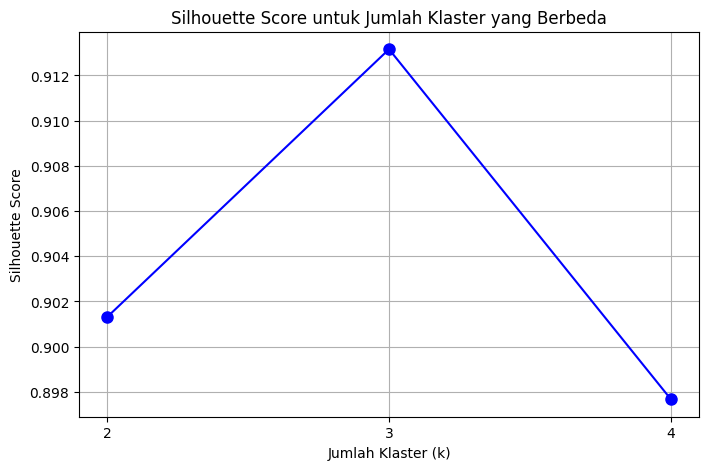

In [14]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()